In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("D:\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data=data.drop(["Id"],axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.duplicated().sum()

3

In [9]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [17]:
data.groupby("Species").count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


In [18]:
import seaborn as sns

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

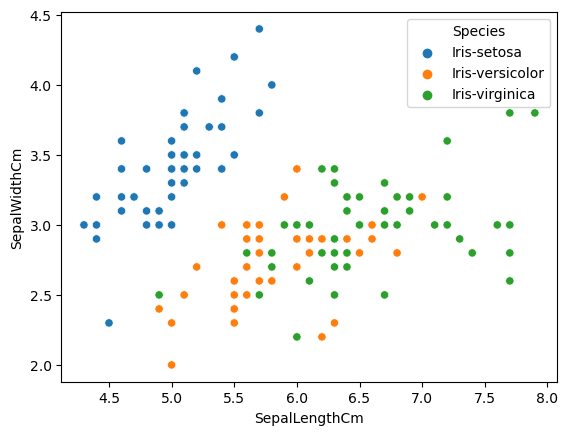

In [19]:
sns.scatterplot(x=data["SepalLengthCm"],y=data["SepalWidthCm"],hue=data['Species'])

In [20]:
x=data.drop(["Species"],axis=1)
y=data["Species"]
print(x.shape)
print(y.shape)

(147, 4)
(147,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
m1 = KNeighborsClassifier()
m1.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
print("Train SCore :",m1.score(x_train,y_train))
print("Test Score :",m1.score(x_test,y_test))

Train SCore : 0.990909090909091
Test Score : 0.9459459459459459


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
ypred=m1.predict(x_test)
ypred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [29]:
def eval_model(ytest,ypred):
    print("Confusion Matrix : \n",confusion_matrix(ytest,ypred))
    print("Classification Report : \n",classification_report(ytest,ypred))

In [30]:
eval_model(y_test,ypred)

Confusion Matrix : 
 [[14  0  0]
 [ 0  9  1]
 [ 0  1 12]]
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        37
      macro avg       0.94      0.94      0.94        37
   weighted avg       0.95      0.95      0.95        37

